# Тема проекта


# Изучение и анализ данных телешоу и фильмов на Netflix

# Описание проекта

**Проект направлен на анализ данных о телешоу и фильмах, доступных на Netflix**, с акцентом на изучение характеристик, таких как тип контента, режиссёр, актёрский состав, страна производства и другие. Цель проекта — выявить закономерности в популярности контента и разработать рекомендации для улучшения контентной стратегии платформы.

**Бизнес-задача**:Анализ популярности телешоу и фильмов на платформе Netflix и исследование зависимостей между различными характеристиками контента и его успехом у аудитории.

# Цели проекта
1.	**Изучение рынка контента на Netflix:** Анализ различных аспектов телешоу и фильмов, включая их тип, страну производства, дату добавления и другие характеристики, чтобы понять, какие параметры влияют на популярность.
2.	**Анализ предпочтений аудитории**: Выявление тенденций и предпочтений зрителей на основе данных о просмотрах и характеристиках контента.



---



# Задачи проекта
1. **Сбор и очистка данных**: Сбор данных о доступном на Netflix контенте и их предварительная обработка для последующего анализа.
2. **Анализ данных**: Проведение анализа для выявления закономерностей и зависимостей между различными характеристиками контента.
3. **Отчётность и визуализация**: Подготовка отчётов и визуализаций для представления результатов анализа и рекомендаций.

---
# Характеристики данных

Таблица netflix.csv содержит следующую информацию о телешоу и фильмах, доступных на Netflix:

1. **show_id**: идентификатор телешоу или фильма
2. **type**: содержит значения TV Show или Movie
3. **title**: название
4. **director**: режиссёр
5. **cast**: список актёров
6. **country**: страна
7. **date_added**: дата добавления на Netflix
8. **release_year**: дата выхода
9. **rating**: рейтинг
10. **duration**: продолжительность
11. **listed_in**: категория фильма(телешоу)
12.	**description**: описание



## 1. Загрузка файла с данными и изучение общей информации

In [1]:
import pandas as pd

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np
from datetime import datetime

Загрузка файла с даннными:

In [2]:
netflix_df = pd.read_csv('netflix_titles.csv')

Сброс ограничений  на количество выводимых столбцов

In [3]:
pd.set_option('display.max_columns', None)

Настройка отображения дробных чисел с двумя знаками после запятой:

In [4]:
pd.set_option('display.float_format', '{:,.2f}'.format)

Вывод первых, последних, случайных столбцов

In [5]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [6]:
netflix_df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [7]:
netflix_df.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2380,s2381,Movie,Riding Faith,Paco Aguilar,"John Schneider, T.C. Stallings, Grace Van Dien...",United States,"June 17, 2020",2020,TV-PG,81 min,"Children & Family Movies, Dramas, Faith & Spir...","Following her father's death, a young woman st..."
5754,s5755,Movie,Sky Ladder: The Art of Cai Guo-Qiang,Kevin MacDonald,Cai Guo-Qiang,United States,"October 14, 2016",2016,TV-MA,80 min,Documentaries,Known for his spectacular pyrotechnic displays...
7679,s7680,TV Show,Origins Collection,Peter McDonnell,NaN,United States,"July 20, 2018",2018,TV-PG,3 Seasons,Docuseries,This documentary series explores the stories b...
2341,s2342,Movie,Athlete A,"Bonni Cohen, Jon Shenk",NaN,United States,"June 24, 2020",2020,PG-13,104 min,"Documentaries, Sports Movies",This documentary focuses on the gymnasts who s...
6955,s6956,TV Show,Hell on Wheels,NaN,"Anson Mount, Colm Meaney, Common, Dominique Mc...","Canada, United Kingdom","May 28, 2016",2016,TV-14,5 Seasons,"Crime TV Shows, TV Action & Adventure",Former Confederate soldier Cullen Bohannon set...


In [8]:
netflix_df.shape

(8807, 12)

Познакомимся с атрибутами датафрейма. Посмотрим на общую информации о датафрейме и на  структуры данных, отдельно

In [9]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


Сделаем транспонирование таблицы для лучшего восприятия информации:

In [10]:
pd.DataFrame(netflix_df.dtypes).T

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,object,object,object,object,object,object,object,int64,object,object,object,object


Данные содержат 12 колонк с признаками, все они являются типом object, кроме целочисленной колонки release_year

Посмотрим на названия колонок, нуждаются ли они в приведении к стандарту по PEP8:

In [11]:
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

В названиях всё, хорошо, все правила соблюденены

### **Выводы**

Для работы и проведения анализа нам предоставлен датасет с фильмами и телефоу популярной компании Netflix, в датафрейме 8807 наблюдений и 12 признаков, типы данных в основном объекты, которые потребуют дальнейшего анализа и приведения к другим типам данных в процессе EDA, например колонка с длительностью фильмов (телешоу) для анализа лучше привести к численным или предположительно сгруппировать по видам для анализа

**Основные моменты**:
1.   Не все типы данных соответсвтуют своим столбцам, в процессе анализа проанализируем и изучим их более детально
2.   В датафрейме *8807 записей, 12 столбцов*.

# Предобработка данных

## 2. Изучение пропущенных значений

Посчитаем пропуски в колонках, где есть пропуски, получим только те столбцы, в которых есть пропуски, отфильтруем датафрейм и выведем результат.

In [12]:
columns_with_nan = netflix_df.columns[netflix_df.isna().sum() > 0]

netflix_df_with_nan = netflix_df[columns_with_nan]

netflix_df_with_nan.isna().sum()

,0
director,2634
cast,825
country,831
date_added,10
rating,4
duration,3


Также для понимания количества пропусков, выведем их в процентном соотношении:

In [13]:
(netflix_df[columns_with_nan].isna().sum() / len(netflix_df)).round(4) * 100

,0
director,29.91
cast,9.37
country,9.44
date_added,0.11
rating,0.05
duration,0.03


Небольшие выводы по пропускам в признаках:
1. **Количество пропусков**:
   - **director**: 2534 пропуска (29.91%). Это может быть вызвано отсутствием данных о режиссёре для многих фильмов.
   - **cast**: 825 пропусков (9.37%). Здесь также могут отсутствовать данные о составе актёров.
   - **country**: 831 пропусков (9.44%) указывают на то, что страна производства не указана для значительного количества записей.
   - **date_added**: 10 пропусков (менее процента). Дата добавления контента на платформу пропущена в небольшом числе случаев.
   - **rating**: 4 пропуска (менее процента) означают, что у некоторых фильмов отсутствует информация о рейтинге.
   - **duration**: 3 пропуска (менее процента) указывают на недостающую информацию о продолжительности для нескольких записей.

2. **Потенциальные проблемы данных** (относительно пропусков):
   - Отсутствие данных может затруднить глубокий анализ, особенно если информация о ключевых атрибутах, таких как режиссёр или страна, важна для анализа или рекомендаций.
   - Стоит изучить, есть ли закономерности в появлении пропусков. Например, они могут быть у контента определённой даты или жанра.

Предлагаю убрать из рассмотрения такие столбцы как: director, cast и description, так как они нам не потребуются в процессе дальнейшего анализа.

In [14]:
netflix_df.drop(["director", "cast", "description"],axis =1,inplace=True)
netflix_df.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries
1,s2,TV Show,Blood & Water,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,s3,TV Show,Ganglands,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,s4,TV Show,Jailbirds New Orleans,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV"
4,s5,TV Show,Kota Factory,India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."


В столбце 'country' 9.44% пропусков, но он интересен для дальнейшей визуализации, поэтому посмотрим, чем можно заменить пустые значения:

In [15]:
netflix_df['country'].value_counts()

,count
country,
United States,2818
India,972
United Kingdom,419
Japan,245
South Korea,199
...,...
"Romania, Bulgaria, Hungary",1
"Uruguay, Guatemala",1
"France, Senegal, Belgium",1


Выведем

In [16]:
pd.DataFrame(netflix_df['country'].value_counts().describe()).T

,count,mean,std,min,25%,50%,75%,max
count,748.00,10.66,111.38,1.00,1.00,1.00,1.00,"2,818.00"


Самое популярное в признаке со страной, это Соединенные штаты. Заменим пустые данные модой и проверим на сколько исказятся показатели

In [17]:
netflix_df['country'] = netflix_df['country'].replace(np.nan, "United States")

In [18]:
pd.DataFrame(netflix_df['country'].value_counts().describe()).T

,count,mean,std,min,25%,50%,75%,max
count,748.00,11.77,139.91,1.00,1.00,1.00,1.00,"3,649.00"


По итогу запонения признака среднее увеличилось на единицу, стандартное отклонение на 8 единиц, но данный столбец нужно будет проанализировать, поэтому оставляем данное заполнение.

У нас остались пропуски в датах, которые надо будет потом привести к соответствующему типу, если внимательно просмотреть данные, то можно увидеть, что даты стоят в порядке убывания, поэтому предлагаю пропуски в колонке заполнить предыдущим значением

In [19]:
netflix_df[netflix_df.date_added.isnull()]

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas"
6174,s6175,TV Show,Anthony Bourdain: Parts Unknown,United States,NaN,2018,TV-PG,5 Seasons,Docuseries
6795,s6796,TV Show,Frasier,United States,NaN,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies"
6806,s6807,TV Show,Friends,United States,NaN,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies"
6901,s6902,TV Show,Gunslinger Girl,Japan,NaN,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows"
7196,s7197,TV Show,Kikoriki,United States,NaN,2010,TV-Y,2 Seasons,Kids' TV
7254,s7255,TV Show,La Familia P. Luche,United States,NaN,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh..."
7406,s7407,TV Show,Maron,United States,NaN,2016,TV-MA,4 Seasons,TV Comedies
7847,s7848,TV Show,Red vs. Blue,United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ..."
8182,s8183,TV Show,The Adventures of Figaro Pho,Australia,NaN,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies"


In [20]:
netflix_df['date_added'] = netflix_df['date_added'].ffill()

С рейтингом немного другая картина, здесь просто так заполнить его не получится топовым или пердыдущим значением. Предлагаю, чтобы не терять информацию (можно их и удалить, так как пропусков в них менее процента, что не скажется на анализ), но посмотрим рейтинг вручную. поиском и заполним вручную.

In [21]:
netflix_df[netflix_df.rating.isnull()]

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,United States,"January 26, 2017",2017,NaN,37 min,Movies
6827,s6828,TV Show,Gargantia on the Verdurous Planet,Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows"
7312,s7313,TV Show,Little Lunch,Australia,"February 1, 2018",2015,NaN,1 Season,"Kids' TV, TV Comedies"
7537,s7538,Movie,My Honor Was Loyalty,Italy,"March 1, 2017",2015,NaN,115 min,Dramas


In [22]:
netflix_df[netflix_df.rating.isnull()].title.values

array(['13TH: A Conversation with Oprah Winfrey & Ava DuVernay',
       'Gargantia on the Verdurous Planet', 'Little Lunch',
       'My Honor Was Loyalty'], dtype=object)

Внимательнее изучим колонку с рейтингом:

In [23]:
netflix_df.rating.unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

Получается в данных не рейтинг, а содержится информация о возврастных ограничениях и длительности фильмов, **как классификация** по типам, приведем пример по изученной информации:
1. G (General Audience): Подходит для всех возрастов. Нет нежелательного контента.

2. PG (Parental Guidance): Рекомендуется родительское руководство. Может содержать незначительные темы, которые могут не подойти всем детям.

3. PG-13 (Parents Strongly Cautioned): Рекомендуется, чтобы дети младше 13 лет смотрели это с родителями. Могут быть материалы, не подходящие для детей.

4. R (Restricted): Ограниченный доступ. Лица младше 17 лет допускаются только в сопровождении взрослого.

5. NC-17 (No One 17 and Under Admitted): Не допускается к просмотру лицам младше 17 лет. Содержит материалы для взрослых.

6. TV-G (General Audience): Подходит для всех возрастов; нет нежелательного контента.

7. TV-PG: Рекомендуется родительское руководство. Может содержать темы, которые могут быть нежелательны для некоторых детей.

8. TV-14: Предназначено для зрителей 14 лет и старше. Может содержать материал, неподходящий для детей младше 14 лет.

9. TV-MA (Mature Audiences): Предназначено для взрослой аудитории. Содержит материал для взрослых, включая: сексуальные сцены, ненормативную лексику и/или насилие.

10. TV-Y: Подходит для детей младшего возраста; специально разработано для этой аудитории.

11. TV-Y7: Рекомендуется для детей 7 лет и старше; может содержать некоторые материалы, неподходящие для более младших детей.

12. TV-Y7-FV: Для детей 7 лет и старше; содержит фэнтезийное насилие.

13. NR (Not Rated): Не имеет официального рейтинга, часто потому, что фильм не проходил процесс сертификации.

14. UR (Unrated): Не оценен, также может означать, что фильм не предназначен для масс.

**Временные метки**:

- 74 min, 84 min, 66 min: Это длительность фильмов или телешоу, измеренная в минутах.

**Примечание**:

Эти рейтинги(классификация) помогают зрителям выбирать контент, который соответствует их возрасту и чувствительности.


Прочитав статьи википедии о данных сериалах и фильмах присвоим следующие рейтинги:
1. '13TH: A Conversation with Oprah Winfrey & Ava DuVernay'  -   NC-17
2. 'Gargantia on the Verdurous Planet' (аниме) - PG-13
3. 'Little Lunch' (Комедия, Детский)  - G
4. 'My Honor Was Loyalty'  - PG-13 (рейтинг из wiki)

Применим информацию

In [24]:
netflix_df.loc[5989, 'rating'] = 'NC-17'
netflix_df.loc[6827, 'rating'] = 'PG-13'
netflix_df.loc[7312, 'rating'] = 'G'
netflix_df.loc[7537, 'rating'] = 'PG-13'

Проверим, остались ли пропущенные значения:

In [25]:
netflix_df.isna().sum().sum()

3

Все данные заполнены, некоторые были исследованы вручную, колонки которые не потребуются в двльнейшем анализе были удалены (директор, актёрский состав, описание)

## 3. Изменение типов данных

Как и говорили ранее, длительность нуждается в приведении к типу int (целочисленному), напишем дополнительную функцию для этого и применим к столбцу, но стоит учитывать, что есть фильмы и телешоу и анализировать их в отдельности

In [26]:
netflix_df.type.value_counts()

,count
type,
Movie,6131
TV Show,2676


In [27]:
netflix_df.sample(3)

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in
2776,s2777,Movie,Making Unorthodox,Germany,"March 26, 2020",2020,TV-G,21 min,"Documentaries, International Movies"
1961,s1962,TV Show,The Playbook,United States,"September 22, 2020",2020,TV-MA,1 Season,Docuseries
2951,s2952,Movie,"Faith, Hope & Love",United States,"February 4, 2020",2019,PG,106 min,"Comedies, Faith & Spirituality, Romantic Movies"


Функция:

In [28]:
def movie_duration(row):
  row = int(str(row).split(' ')[0])
  return row


In [29]:
mask = netflix_df['duration'].notnull()

netflix_df.loc[mask, 'duration'] = netflix_df.loc[mask, 'duration'].apply(movie_duration)

Посмотрим что получилось:

In [30]:
netflix_df.sample(5)

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in
4089,s4090,TV Show,The Big Family Cooking Showdown,United Kingdom,"February 22, 2019",2018,TV-PG,2,"British TV Shows, International TV Shows, Real..."
829,s830,Movie,Dog Gone Trouble,United States,"May 28, 2021",2021,TV-Y7,88,"Children & Family Movies, Comedies"
2382,s2383,Movie,The Darkness,United States,"June 16, 2020",2016,PG-13,92,"Horror Movies, Thrillers"
6476,s6477,Movie,Christian Mingle,United States,"June 6, 2019",2014,PG,99,"Comedies, Faith & Spirituality, Romantic Movies"
8685,s8686,Movie,VS.,United Kingdom,"June 19, 2019",2018,TV-MA,99,Dramas


В колонке с длительностью 3 пропуска, которые надо заполнить, чтобы изменить тип данных, предлагаю поставить нулевые значения, чтобы перевести колонку к целочисленному типу:

In [31]:
netflix_df['duration'] = pd.to_numeric(netflix_df['duration'].fillna(0), errors='coerce', downcast='integer')

In [32]:
pd.DataFrame(netflix_df.dtypes).T

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in
0,object,object,object,object,object,int64,object,int16,object


Тип данных успешно изменён.

Теперь перейдем к колонке с датами и посмотрим как быдем менять в ней тип данных (возможно можно было бы обойтись столбцом с годом выпуска):

In [33]:
netflix_df['date_added'] = netflix_df['date_added'].apply(lambda x: x.strip().replace(',', ''))

In [34]:
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'], format='%B %d %Y')

Еще раз убедимся в правильности и корректности приведенных типов:

In [35]:
pd.DataFrame(netflix_df.dtypes).T

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in
0,object,object,object,object,datetime64[ns],int64,object,int16,object


Приступим к поиску дубликатов

## 4. Поиск дубликатов

In [36]:
duplicates = netflix_df.duplicated().sum()
print("Количество дубликатов: ",duplicates )

Количество дубликатов:  0


In [37]:
netflix_df.title.duplicated().sum()

0

Дубликатов не обнаружено по всем данным и по названиям, вывод: очистка не требуется.

## 5. Выводы к разделу 1



1.   Успешно загрузили датафрейм
2.   Проверили датафрейм путём вывода:

*   Первых строк
*   Последних строк
*   Случайных строк
*   Изучили общую информация и сделали вывод о предстоящей работе

3.   Выполинили проверку на наличие пропусков и дубликатов:

*   Пропуски были обнаружены в колонках director, cast, country, date_added, rating, duration.
*   Колонки director, cast и duration было решено удалить, так как они не имеют ценности в дальнейшем анализе
*   Колонку country заполнили самым часто встречающимся значением (США)
*   Колонку date_added после просмотра поочередности данных решено было заполнить предыдущим значением
*   Колонку rating, в котором не было 4 значения мы заполнили вручную, с помощью поиска информации в сторонних источниках.
*   Дубликаты не выявлены


4.   Выявили, что не все типы данных соответствуют столбцам:
*    Колонка с длительностью фильмов и сериалов была приведена к типу int
*    Колонка с датами к типу datetime





# Исследовательский анализ данных

## 1. Индексация (по координатам, логическая)

In [38]:
netflix_df.sample()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in
6621,s6622,Movie,Dolphin Kick,United States,2019-06-05,2019,TV-PG,90,Children & Family Movies


Применим индексацию по координатам:

In [39]:
print('Название 51-го фильма (телешоу):', netflix_df.loc[51, 'title'])
print('Страна 2542-го фильма (телешоу):', netflix_df.loc[2542, 'country'])
print('Дата добавления 9-го фильма (телешоу):', netflix_df.loc[9, 'date_added'])
print('Год выпуска 8800-го фильма (телешоу):', netflix_df.loc[8800, 'release_year'])
print('Категория 6050-го фильма (телешоу):', netflix_df.loc[6050, 'rating'])
print('Длительность 111-го фильма (телешоу):', netflix_df.loc[111, 'duration'])
print('Категория 141-го фильма (телешоу):', netflix_df.loc[141, 'listed_in'])

Название 51-го фильма (телешоу): InuYasha the Movie 2: The Castle Beyond the Looking Glass
Страна 2542-го фильма (телешоу): Canada
Дата добавления 9-го фильма (телешоу): 2021-09-24 00:00:00
Год выпуска 8800-го фильма (телешоу): 2012
Категория 6050-го фильма (телешоу): TV-MA
Длительность 111-го фильма (телешоу): 1
Категория 141-го фильма (телешоу): Action & Adventure


Проведем фильтрацию и подсчет уникальных значений

In [40]:
# Фильтрация и подсчет
print('Количество шоу с рейтингом TV-MA:')
print(netflix_df.loc[netflix_df['rating'] == 'TV-MA']['rating'].count())
print('Количество шоу, выпущенных после 2015 года:')
print(netflix_df.loc[netflix_df['release_year'] > 2015]['release_year'].count())
print('Количество фильмов в жанре "Comedies":')
print(netflix_df.loc[netflix_df['listed_in'].str.contains('Comedies')]['listed_in'].count())
print('Количество шоу с продолжительностью более 100 минут:')
print(netflix_df[netflix_df['type'] == 'Movie'].loc[netflix_df['duration'] > 100]['duration'].count())

# Подсчет уникальных значений
print('Количество уникальных стран:')
print(netflix_df['country'].nunique())
print('Количество уникальных жанров:')
print(netflix_df['listed_in'].nunique())

# Список первых 5 шоу с наивысшим годом выпуска
print('Первые 5 шоу с наивысшим годом выпуска:')
display(netflix_df.nlargest(5, 'release_year')[['title', 'release_year']])

Количество шоу с рейтингом TV-MA:
3207
Количество шоу, выпущенных после 2015 года:
5656
Количество фильмов в жанре "Comedies":
2255
Количество шоу с продолжительностью более 100 минут:
2814
Количество уникальных стран:
748
Количество уникальных жанров:
514
Первые 5 шоу с наивысшим годом выпуска:


,title,release_year
1,Blood & Water,2021
2,Ganglands,2021
3,Jailbirds New Orleans,2021
4,Kota Factory,2021
5,Midnight Mass,2021


С помощью индексации и фильтрации фильмов и телешоу мы посмотрели, что:

- 51-й фильм имеет название "InuYasha the Movie 2: The Castle Beyond the Looking Glass" и относится к стране Канада, с датой добавления 24 сентября 2021 года.
- Год выпуска данного фильма - 2012, он классифицирован как TV-MA и является экшеном и приключением.
- В датасете представлено 3207 шоу с рейтингом TV-MA, а также 5656 шоу, выпущенных после 2015 года.
- В него входит 2255 комедий и 2814 шоу продолжительностью более 100 минут.
- Общее количество уникальных стран составляет 748, а жанров - 514.
- 2021 год является наиболее продуктивным, с пятью шоу, выпущенными в этом году, включая "Blood & Water" и "Midnight Mass".

Эти результаты демонстрируют разнообразие контента, доступного в данной базе данных фильмов и телешоу.

## 2. Сортировка данных

Отсортируем наши данные по разным признакам и выведем информацию:

In [41]:
# Сортировка по типу контента
sorted_df = netflix_df.sort_values(by='type')
print("Сортировка по типу контента:")
display(sorted_df[['type', 'title']].iloc[[0, -1]])

Сортировка по типу контента:


,type,title
0,Movie,Dick Johnson Is Dead
4403,TV Show,Medal of Honor


In [42]:
# Сортировка по году выпуска
sorted_by_release_year = netflix_df.sort_values(by='release_year', ascending=False)
print("Сортировка по году выпуска:")
display(sorted_by_release_year[['title', 'release_year']].iloc[[0, -1]])

Сортировка по году выпуска:


,title,release_year
693,Ali & Ratu Ratu Queens,2021
4250,Pioneers: First Women Filmmakers*,1925


In [43]:
# Сортировка по длительности
sorted_by_duration = netflix_df.sort_values(by='duration', ascending=False)
print("Сортировка по длительности:")
display(sorted_by_duration[['title', 'duration']].iloc[[0, -1]])

Сортировка по длительности:


,title,duration
4253,Black Mirror: Bandersnatch,312
5794,Louis C.K.: Hilarious,0


In [44]:
# Сортировка по добавлению даты
sorted_by_date_added = netflix_df.sort_values(by='date_added', ascending=False)
print("Сортировка по дате добавления:")
display(sorted_by_date_added[['title', 'date_added']].iloc[[0, -1]])


Сортировка по дате добавления:


,title,date_added
0,Dick Johnson Is Dead,2021-09-25
5957,To and From New York,2008-01-01


Обобщим уведенную информацию:
**Сортировка по типу контента:**
- Фильм: "Dick Johnson Is Dead"
- Сериал: "Medal of Honor"

**Сортировка по году выпуска:**
- Новый контент: "Ali & Ratu Ratu Queens" (2021)
- Старый контент: "Pioneers: First Women Filmmakers*" (1925)

**Сортировка по длительности:**
- Долгий: "Black Mirror: Bandersnatch" (312 минут)
- Короткий: "Louis C.K.: Hilarious" (0 минут)

**Сортировка по дате добавления:**
- Последний добавленный: "Dick Johnson Is Dead" (25 сентября 2021)
- Самый старый: "To and From New York" (1 января 2008)

Сделаем фильтрацию данных

## 3. Фильтрация данных

In [45]:
print("Количество фильмов и сериалов:")
display(netflix_df['type'].value_counts())

Количество фильмов и сериалов:


,count
type,
Movie,6131
TV Show,2676


In [46]:
print("Наиболее частые страны производства:")
display(netflix_df['country'].value_counts().head())

Наиболее частые страны производства:


,count
country,
United States,3649
India,972
United Kingdom,419
Japan,245
South Korea,199


In [47]:
print("Рейтинг наиболее популярных фильмов (по количеству):")
display(netflix_df['rating'].value_counts().head())

Рейтинг наиболее популярных фильмов (по количеству):


,count
rating,
TV-MA,3207
TV-14,2160
TV-PG,863
R,799
PG-13,492


In [48]:
print("Самые распространенные жанры (listed_in):")
display(netflix_df['listed_in'].value_counts().head())

Самые распространенные жанры (listed_in):


,count
listed_in,
"Dramas, International Movies",362
Documentaries,359
Stand-Up Comedy,334
"Comedies, Dramas, International Movies",274
"Dramas, Independent Movies, International Movies",252


Посмотрим на количество фильмов(шоу), добавленных в определенных годах:

In [49]:
print("Количество шоу, добавленных в 2020 году:")
print(netflix_df.loc[netflix_df['date_added'].dt.year == 2020]['date_added'].count())

print("Количество шоу, добавленных после 2018 года:")
print(netflix_df.loc[netflix_df['date_added'] > '2018-12-31']['date_added'].count())

Количество шоу, добавленных в 2020 году:
1879
Количество шоу, добавленных после 2018 года:
5394


Сделаем вывод об увиденной информации:
1. **Год выпуска**:
   - Наиболее старый фильм в базе данных — "Pioneers: First Women Filmmakers*", выпущенный в 1925 году.
   - Самый последний релиз — "Yasuke", который вышел в 2021 году. Это демонстрирует широкий временной диапазон контента на платформе.

2. **Длительность**:
   - Минимальная длительность — 0 минут,она образовалась в связи с заполнением пропусков
   - Максимальная длительность составляет 312 минут, что говорит о наличии продолжительных фильмов или специальных проектов, таких как полнометражные шоу или документальные серии.

3. **Тип контента**:
   - На Netflix больше фильмов (6131) по сравнению с сериалами (2676), что может свидетельствовать о том, что платформа в большей степени ориентирована на фильмографию.

4. **Страны производства**:
   - Наиболее представлена продукция Соединенных Штатов (3649 шоу), что соответствует ожидаемому фокусу Netflix.
   - Также есть значительное количество индийских (972) и британских (419) телепередач, что указывает на глобальный охват платформы.

5. **Популярные рейтинги**:
   - Наиболее распространенный рейтинг — TV-MA (3207), который обычно предназначен для взрослой аудитории. Это может говорить о том, что платформа активно предлагает контент для взрослых.
   - Рейтинги TV-14 и TV-PG также популярны, что свидетельствует о разнообразии контента для разных возрастных категорий.

6. **Распространенные жанры**:
   - Наиболее часто встречающиеся жанры включают "Драмы, Международные Фильмы", "Документальные Фильмы" и "Стэнд-ап Комедию", что показывает разнообразие контента, предложенного пользователям.

7. **Динамика добавления контента**:
   - В 2020 году было добавлено 1878 шоу, и всего после 2018 года добавлено 5376 шоу. Это указывает на значительный рост добавляемого контента в последние годы.

Эти данные демонстрируют разнообразие  контента по типу, рейтингу, стране производства и жанру.

## 4. Сводные таблицы

Сводная таблица по количеству фильмов и типу контента

In [50]:
print("Сводная таблица по количеству фильмов и типу контента:")
netflix_df.pivot_table(values='show_id', index='release_year', columns='type', aggfunc='count').sample(10)

Сводная таблица по количеству фильмов и типу контента:


type,Movie,TV Show
release_year,,
2015,398.00,162.00
1997,34.00,4.00
1989,15.00,1.00
1970,2.00,NaN
1978,7.00,NaN
2013,225.00,63.00
1955,3.00,NaN
1972,4.00,1.00
2006,82.00,14.00


Сводная таблица по количеству контента по странам:

In [51]:
print("Сводная таблица по количеству контента по странам:")
netflix_df.pivot_table(values='show_id', index='country', aggfunc='count').sample(10)

Сводная таблица по количеству контента по странам:


,show_id
country,
"Norway, Iceland, United States",2
"United States, France, United Kingdom, Japan",1
"Czech Republic, France",1
"France, United Kingdom",1
"United Kingdom, Canada, United States, Germany",1
"India, Germany, France",1
"Spain, France, Canada",1
"United States, Colombia",3
Saudi Arabia,8


Сводная таблица по количеству фильмов и жанрам:

In [52]:
print("Сводная таблица по количеству фильмов и жанрам:")
netflix_df.pivot_table(values='show_id', index='listed_in', columns='type', aggfunc='count').sample(10)

Сводная таблица по количеству фильмов и жанрам:


type,Movie,TV Show
listed_in,,
"TV Comedies, Teen TV Shows",NaN,6.00
"TV Action & Adventure, TV Dramas, TV Sci-Fi & Fantasy",NaN,10.00
Independent Movies,1.00,NaN
"TV Comedies, TV Dramas, TV Horror",NaN,1.00
"TV Dramas, TV Mysteries, TV Thrillers",NaN,2.00
"Horror Movies, Thrillers",54.00,NaN
"Children & Family Movies, Sci-Fi & Fantasy",8.00,NaN
"Crime TV Shows, TV Comedies, Teen TV Shows",NaN,1.00
"Action & Adventure, Anime Features, International Movies",38.00,NaN


Сводная таблица по длительности и типу контента:

In [53]:
print("Сводная таблица по средней длительности и типу контента:")
netflix_df.pivot_table(values='duration', index='type', aggfunc='mean')

Сводная таблица по средней длительности и типу контента:


,duration
type,
Movie,99.53
TV Show,1.76


Фильмы длятся около 100 минут, а сериалы (шоу) около 2-х сезонов. Таким образом мы получили достаточно интересную информацию о наших данных.

## 5. Группировка данных, агрегатные функции

Группировка по году релиза

In [54]:
grouped_year = netflix_df.groupby('release_year').agg({
    'show_id': 'count',                                        # Количество шоу
    'type': lambda x: x.value_counts().to_dict(),              # Счетчики по типам
    'duration': ['mean', 'min', 'max'],                        # Средняя, минимальная и максимальная длительность
    'listed_in': lambda x: x.value_counts().idxmax()           # Популярный жанр
})
grouped_year.columns = [
    'show_id_count',
    'type_distribution',
    'duration_mean',
    'duration_min',
    'duration_max',
    'listed_in_popular'
]

print("Группировка по году релиза:")
grouped_year

Группировка по году релиза:


,show_id_count,type_distribution,duration_mean,duration_min,duration_max,listed_in_popular
release_year,,,,,,
1925,1,{'TV Show': 1},1.00,1,1,TV Shows
1942,2,{'Movie': 2},35.00,18,52,"Classic Movies, Documentaries"
1943,3,{'Movie': 3},62.67,45,82,Documentaries
1944,3,{'Movie': 3},52.00,40,76,"Classic Movies, Documentaries"
1945,4,"{'Movie': 3, 'TV Show': 1}",38.75,1,63,"Classic Movies, Documentaries"
...,...,...,...,...,...,...
2017,1032,"{'Movie': 767, 'TV Show': 265}",71.37,0,212,Documentaries
2018,1147,"{'Movie': 767, 'TV Show': 380}",64.88,1,312,Stand-Up Comedy
2019,1030,"{'Movie': 633, 'TV Show': 397}",58.16,1,209,Stand-Up Comedy


Выводы:

1. Количество Шоу:
   - Количество выпущенных шоу возросло с годами. Например, в 1925 году был выпущен только один проект, а в 2018 году их количество достигло пика с 1147 проектами.

2. Продолжительность Шоу:
   - Средняя продолжительность шоу значительно варьируется по годам. В 1925 году средняя продолжительность была 1 минуту, тогда как в 2018 году средняя продолжительность достигла 64.8 минут.

3. Типы Шоу:
   - В 1925 году была выпущена только одна телепередача. В последние годы (с 2017 по 2021) заметен существенный рост как в фильмах, так и в телешоу. Например, в 2017 году было выпущено 767 фильмов и 265 телешоу, а в 2021 году количество телешоу превысило количество фильмов (315 телешоу против 277 фильмов).

4. Популярные Категории:
   - В разные годы популярны разные категории шоу. Например, в 2017 и 2018 годах популярны документальные фильмы и комедийные стендапы, в то время как в 2021 году популярными категориями стали детские программы (Kids' TV).

5. Минимальная и Максимальная Продолжительность:
   - Минимальная и максимальная продолжительности шоу также разнообразны. Например, в 1942 году минимальная продолжительность шоу составляла 18 минут, а максимальная — 52 минуты. В более поздние годы имеется тенденция к более длинным шоу, достигающим длительности более 200 минут.

## 6. Поиск закономерностей, варианты решения бизнес-задачи

In [55]:
# Описательная статистика для числовых данных
numerical_describe = netflix_df.describe()

# Описательная статистика для категориальных данных
categorical_describe = netflix_df.describe(include=[object])

# Выводим обе статистики
print("Числовая статистика:")
numerical_describe

Числовая статистика:


,date_added,release_year,duration
count,8807,"8,807.00","8,807.00"
mean,2019-05-16 14:22:10.123765248,"2,014.18",69.82
min,2008-01-01 00:00:00,"1,925.00",0.00
25%,2018-04-04 00:00:00,"2,013.00",2.00
50%,2019-07-01 00:00:00,"2,017.00",88.00
75%,2020-08-18 00:00:00,"2,019.00",106.00
max,2021-09-25 00:00:00,"2,021.00",312.00
std,NaN,8.82,50.82


 **dateadded**:
  - Средняя дата добавления (mean) находится в 2019 году, что указывает на то, что множество названий добавлено в последние годы.
  - Даты добавления варьируются от 2008 года до 2021 года.
  - Медиана (50% или median) даты добавления попадает на середину 2017 года.
  
**releaseyear**:
  - Средний год выпуска составляет около 2014 года.
  - Самый старый год выпуска — 1925, а самый свежий — 2021.
  - Значение стандартного отклонения (std) — 8.8, что указывает на умеренное разбросание годовых данных.

**duration**:
  - Средняя продолжительность составляет почти 70 минут.
  - Минимальная продолжительность  0
  - Максимальная продолжительность составляет 312 минут.
  - Стандартное отклонение (std) — около 50.8, что указывает на широкий разброс продолжительности фильмов и сериалов.

In [56]:
print("\nКатегориальная статистика:")
categorical_describe


Категориальная статистика:


,show_id,type,title,country,rating,listed_in
count,8807,8807,8807,8807,8807,8807
unique,8807,2,8807,748,17,514
top,s1,Movie,Dick Johnson Is Dead,United States,TV-MA,"Dramas, International Movies"
freq,1,6131,1,3649,3207,362


**showid:**
  - Все значения уникальны, что ожидаемо, так как это идентификаторы шоу.

**type:**
  - В датасете содержится два типа: "Movie" и "TV Show".
  - Свыше 6000 из 8807 являются фильмами.

**title:**
  - Всего 8807 уникальных названий.
  - Наиболее часто встречающееся название — "Dick Johnson Is Dead" встречается только один раз, что говорит о высокой уникальности данных.

**country:**
  - Всего 748 уникальных стран.
  - Наиболее частой страной являются "United States", с 3649 шоу из этой страны.

**rating:**
  - 17 уникальных рейтингов.
  - Наиболее частый рейтинг — "TV-MA", который встречается 3207 раз.

**listedin**:
  - Всего 514 уникальных категорий/жанров.
  - Наиболее часто встречающейся категорией является "Dramas, International Movies", с частотой 362.

In [57]:
print("Распределение фильмов(шоу) по годам выпуска:")
netflix_df['release_year'].value_counts()

Распределение фильмов(шоу) по годам выпуска:


,count
release_year,
2018,1147
2017,1032
2019,1030
2020,953
2016,902
...,...
1959,1
1925,1
1961,1


Наблюдается увеличение количества выпускаемых фильмов по годам, если посмотреть на таблицу, то в 1925-1966 (что отображено) выпускались единичные фильмы, чем в настоящее время.

## 7. Выводы к разделу 2

- Рост количества выпускаемых фильмов: Количество фильмов заметно выросло по сравнению с прошлыми десятилетиями. В период более ранний (1925 по 1966  и дальше) выходили единичные фильмы, а сейчас их значительно больше.
- Популярность фильмов: Из двух типов контента — фильмы и сериалы — фильмы составляют более 6000 из 8807 записей.
- Уникальность названий: В базе данных все 8807 названий уникальны, указывая на разнообразие доступного контента.
- Географическое разнообразие: Несмотря на 748 представленных стран, США явно лидирует, предоставляя около 3649 шоу.
- Ориентация на взрослую аудиторию: Рейтинг "TV-MA" встречается чаще других, что определяет тенденцию к контенту для взрослой аудитории.
- Разнообразие жанров: Широкий выбор жанров представлен в 514 уникальных категориях, наиболее популярными из которых являются "Dramas, International Movies".
- Недавний всплеск добавления контента: Большая часть контента была добавлена в последние годы, средняя дата добавления приходится на 2019 год.
- Выпуск по годам: Средний год выпуска шоу — около 2014 года, с материалами, выпускаемыми с 1925 года.
- Продолжительность контента: Продолжительность варьируется от 2 до 312 минут, средняя продолжительность составляет около 70 минут.

# Графический анализ данных

## 1. Диаграммы, библиотека Matplotlib

Разделим наши данные на фильмы и телешоу, чтобы смотреть на данные

In [58]:
netflix_df_movie = netflix_df[netflix_df['type'] == 'Movie']
netflix_df_show = netflix_df[netflix_df['type'] != 'Movie']

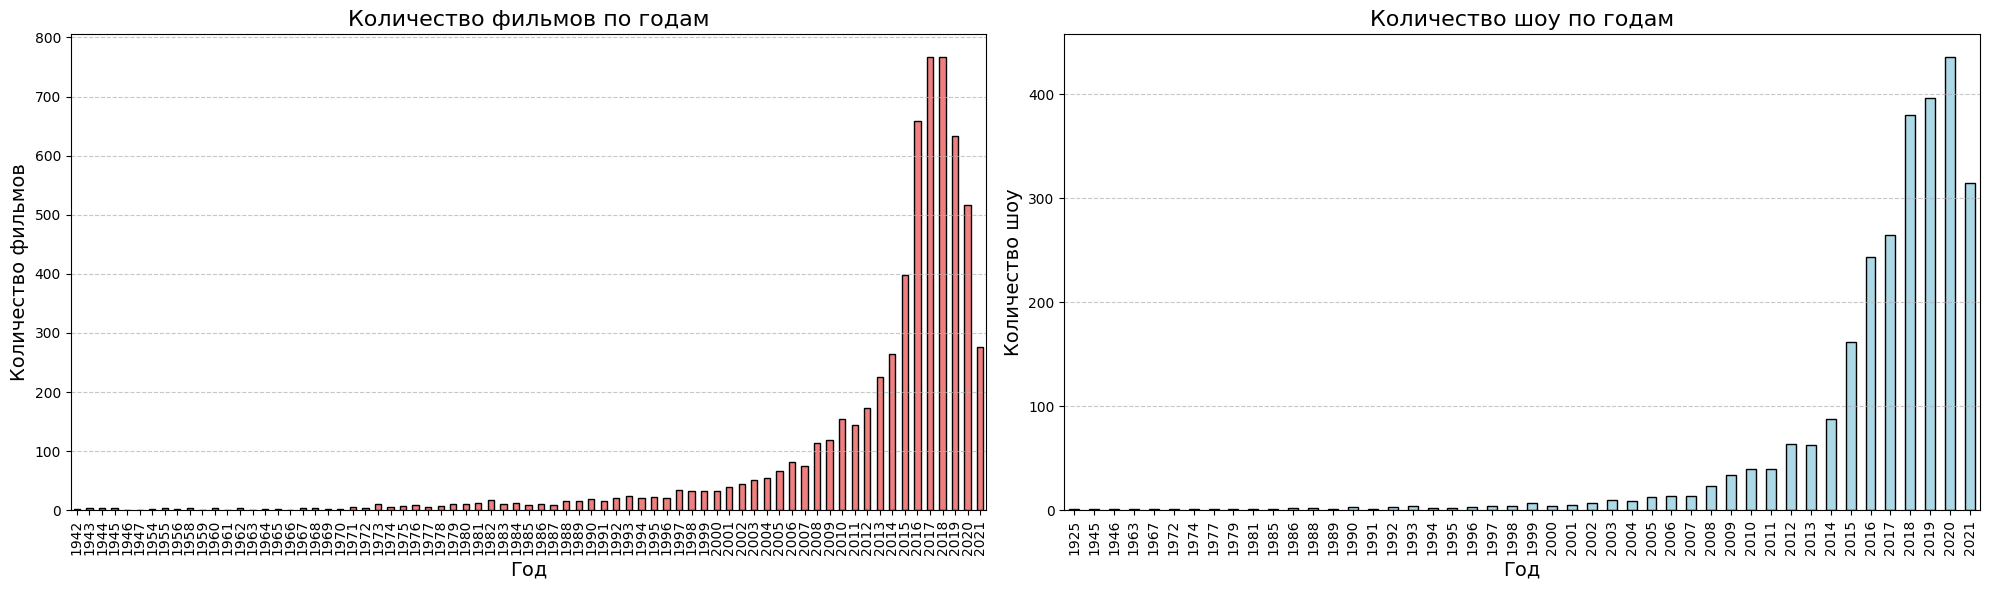

In [59]:
movie_counts = netflix_df_movie['release_year'].value_counts().sort_index()
show_counts = netflix_df_show['release_year'].value_counts().sort_index()

plt.figure(figsize=(20, 6))

# Гистограмма для фильмов
plt.subplot(1, 2, 1)
movie_counts.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Количество фильмов по годам', fontsize=16)
plt.xlabel('Год', fontsize=14)
plt.ylabel('Количество фильмов', fontsize=14)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Гистограмма для шоу
plt.subplot(1, 2, 2)
show_counts.plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Количество шоу по годам', fontsize=16)
plt.xlabel('Год', fontsize=14)
plt.ylabel('Количество шоу', fontsize=14)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

На графиках представлена динамика выпуска фильмов и шоу по годам.

Количество фильмов по годам:
- На графике слева мы видим значительный рост количества фильмов, начиная с конца 1990-х годов.
- До 1980 года количество фильмов увеличивалось медленно и находилось на низком уровне.
- С конца 1990-х годов наблюдается экспоненциальный рост, достигающий пика в последние годы, что свидетельствует о значительном увеличении кинопроизводства.

Количество шоу по годам:
- График справа показывает схожую тенденцию для телевизионных шоу.
- До 2000 года количество новых шоу росло крайне медленно.
- С начала 2000-х годов начинается значительный рост, который ускоряется в последующие десятилетия, достигая пика в последние годы.

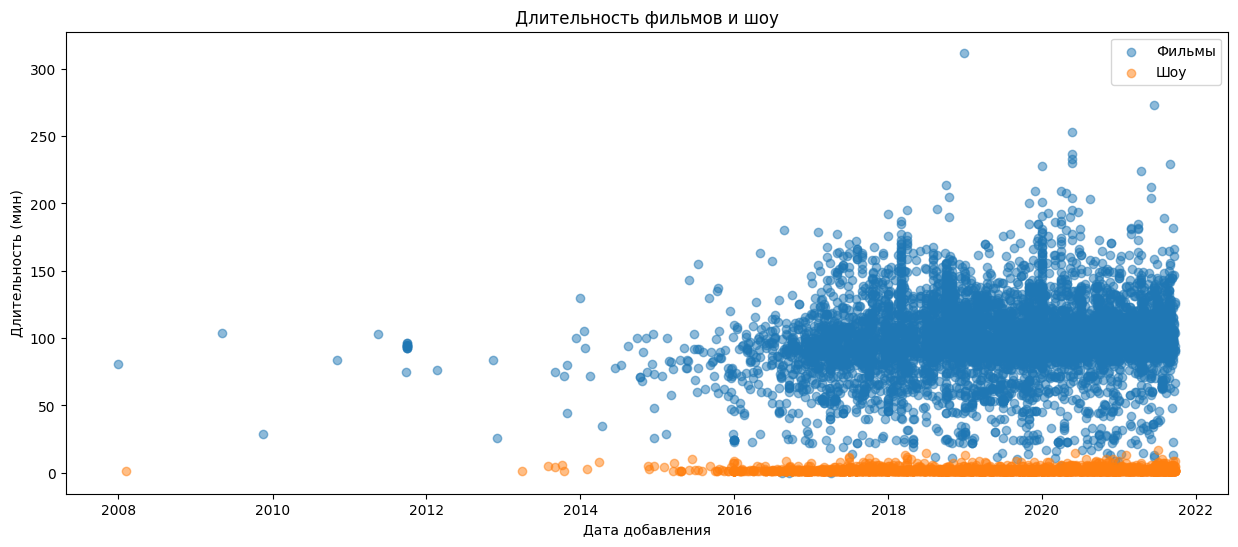

In [60]:
plt.figure(figsize=(15, 6))

plt.scatter(netflix_df_movie['date_added'], netflix_df_movie['duration'], label='Фильмы', alpha=0.5)

plt.scatter(netflix_df_show['date_added'], netflix_df_show['duration'], label='Шоу', alpha=0.5)

plt.title('Длительность фильмов и шоу')
plt.xlabel('Дата добавления')
plt.ylabel('Длительность (мин)')

plt.legend()

plt.show()

На графике представлена динамика длительности фильмов (синие точки) и телевизионных шоу (оранжевые точки) на протяжении времени с 2008 по 2022 год.

Основные наблюдения:
- Фильмы:
  - С 2008 по 2012 годы количество фильмов было относительно небольшим, и их продолжительность варьировалась в широком диапазоне.
  - С 2013 года наблюдается значительное увеличение количества фильмов, добавляемых ежегодно.
  - С течением времени большинство фильмов укладываются в диапазон от 60 до 120 минут, хотя встречаются и исключения с длительностью до 300 минут.
  - В последние годы плотность точек возрастает, что указывает на ещё больший рост количества фильмов.

- Шоу:
  - В отличие от фильмов, длительность шоу остаётся более стабилизированной и в значительной степени укладывается в диапазон до 50 минут.
  - Количество шоу существенно увеличивается после 2012 года, следуя тому же тренду, что и для фильмов.
  - Плотность оранжевых точек указывает на стабильно высокое количество добавленных шоу, особенно в последние годы.

Вывод:
График ясно демонстрирует значительный рост в производстве и добавлении как фильмов, так и шоу с 2012 года. Если продолжительность фильмов остаётся разнообразной с преобладанием в районе 60-120 минут, то длительность шоу является более стандартной, укладывающейся в диапазон до 50 минут. Эти тренды могут указывать на высокий спрос на разнообразный видеоконтент, а также на развитие технологий и платформ, облегчающих создание и распространение аудиовизуальных материалов.

Посмотрим подробнее на количество сезонов

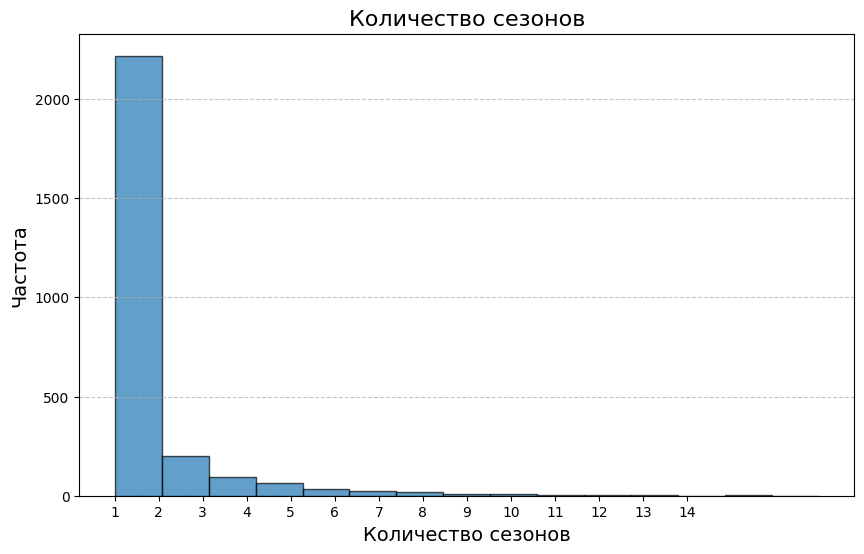

In [61]:
plt.figure(figsize=(10, 6))
netflix_df_show.duration.plot(kind='hist',
                               bins=15,
                               edgecolor='black',
                               alpha=0.7)

plt.title('Количество сезонов', fontsize=16)
plt.xlabel('Количество сезонов', fontsize=14)
plt.ylabel('Частота', fontsize=14)

plt.xticks(range(1, 15))

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Основные наблюдения:
- Односезонные шоу:
  - Наибольшее количество телевизионных шоу (более 2000) имеют только один сезон. Этот результат явно доминирует среди всех возможных вариантов.

- Много сезонов:
  - Двухсезонные шоу встречаются значительно реже (около 300 случаев).
  - Количество шоу с тремя и более сезонами продолжает уменьшаться, практически исчезая после пяти сезонов.
  - Шоу с более чем десятью сезонами встречаются крайне редко.

Теперь посмотрим на жанры:

<Figure size 1500x600 with 0 Axes>

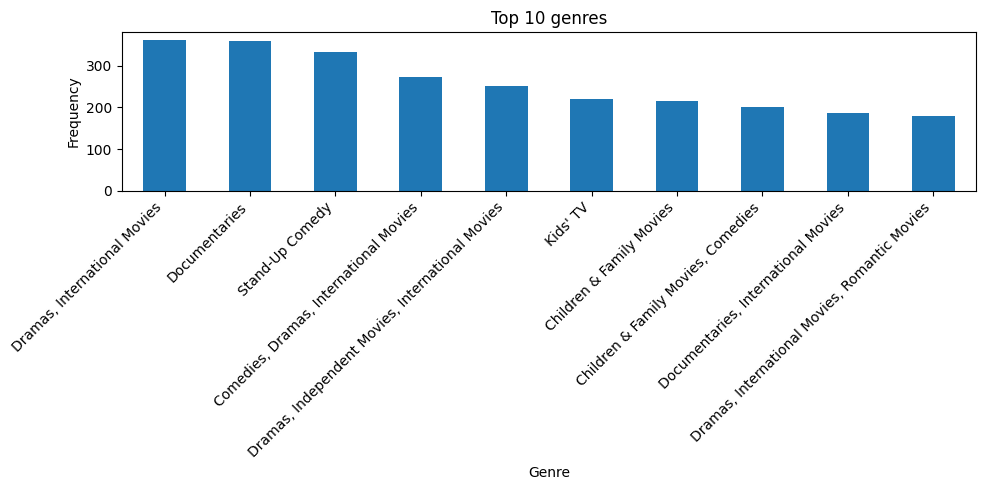

In [62]:
top10_genres = (
    netflix_df[['title', 'listed_in']]
    .groupby('listed_in')
    .count()
    .sort_values(by='title', ascending=False)
    .head(10)
)
plt.figure(figsize=(15, 6))
top10_genres.plot(
    kind='bar',
    figsize=(10, 5),
    legend=False,
    title='Top 10 genres',
    xlabel='Genre',
    ylabel='Frequency'
)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

Основные наблюдения:

1. Драмы и международные фильмы:
    - Драмы и международные фильмы занимают лидирующие позиции, с частотой превышающей 300. Это свидетельствует о высоком интересе аудитории к серьезным и насыщенным событиями сюжетам, а также к фильмовым и шоу-продуктам из разных стран мира.

2. Документальные фильмы:
    - Документальные фильмы также пользуются высокой популярностью, занимая вторую позицию. Это может говорить о растущем интересе зрителей к реальным историям и событиям.

3. Комедии и стендап:
    - Жанры комедии и стендап-комедии также занимают значимые места в рейтинге, что демонстрирует устойчивый интерес к развлекательному контенту.

4. Смешанные жанры:
    - Жанры, сочетающие драмы и комедии, а также независимые фильмы, также довольно популярны, что указывает на успех гибридного контента, комбинирующего элементы различных жанров.

5. Детские и семейные фильмы:
    - Фильмы и ТВ-программы для детей и семей занимают важное место, подтверждая значимость семейного контента.


## 2. Диаграммы, библиотека Seaborn

Посмотрим Топ-10 стран, выпускающих контент для Netflix

In [63]:
countries = netflix_df[['country', 'type']].groupby('country').count().sort_values('type',ascending=False).head(10)

countries.reset_index(inplace=True)

countries

,country,type
0,United States,3649
1,India,972
2,United Kingdom,419
3,Japan,245
4,South Korea,199
5,Canada,181
6,Spain,145
7,France,124
8,Mexico,110
9,Egypt,106


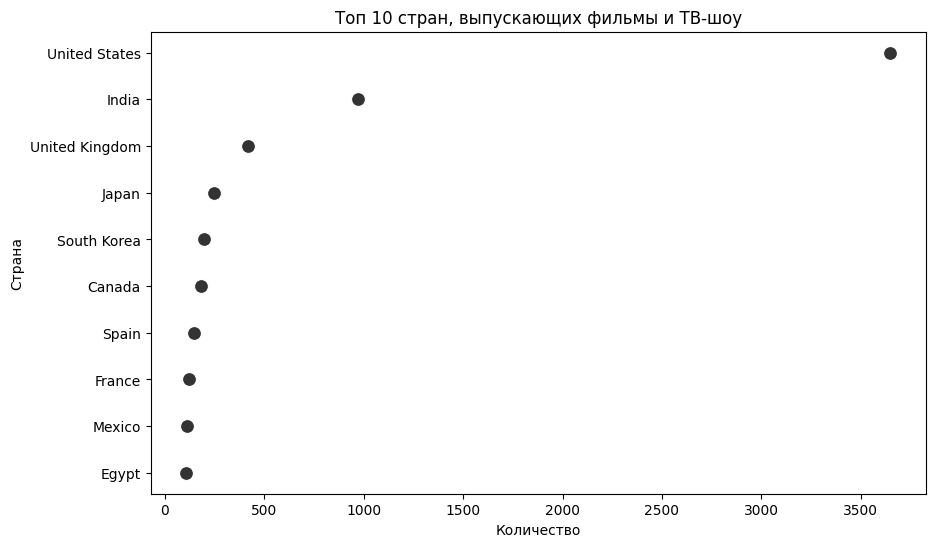

In [64]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x = countries.type, y = countries.country, s=100, color=".2")
sns.set_style("darkgrid")
plt.title('Топ 10 стран, выпускающих фильмы и ТВ-шоу')
plt.xlabel('Количество')
plt.ylabel('Страна')
plt.show()

1. Соединенные Штаты:
    - Соединенные Штаты уверенно лидируют с показателем, превышающим 3500 произведений. Этот результат подчеркивает как масштаб, так и влияние американской киноиндустрии на мировую развлекательную индустрию.

2. Индия:
    - Индия значительно отстает, но все же занимает вторую позицию с количеством около 1000 фильмов и ТВ-шоу. Это подтверждает сильное присутствие Болливуда и других региональных киноиндустрий Индии.

3. Великобритания:
    - Великобритания находится на третьей позиции, производя около 800 произведений. Это говорит о значимости британского контента на мировом уровне.

4. Япония и Южная Корея:
    - Япония и Южная Корея следуют далее в списке. Оба эти рынка известны как своими собственными, так и экспортными успехами в области анимации, драмы и поп-культуры.

5. Канада, Испания, Франция, Мексика и Египет:
    - Остальные страны в топ-10, такие как Канада, Испания, Франция, Мексика и Египет, также делают значительный вклад в мировой контентный ландшафт. Особенно заметно присутствие европейских и латиноамериканских стран, что указывает на разнообразие регионального контента.

Интересно посмотреть на продолжительность фильмов по этим странам:

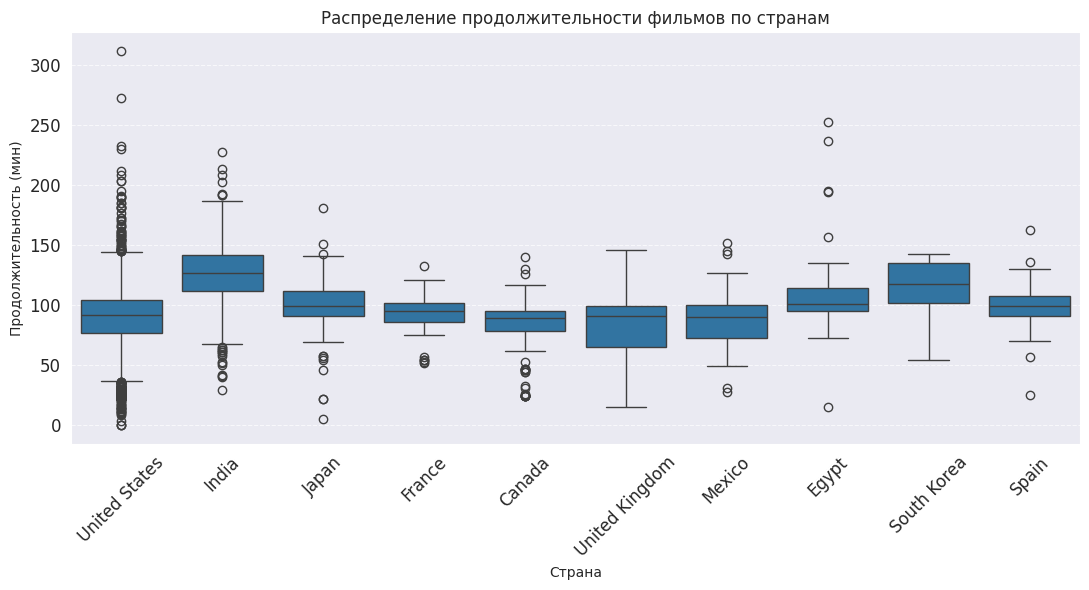

In [65]:
filtered_data = netflix_df_movie[netflix_df_movie['country'].isin(countries['country'].values)]

plt.figure(figsize=(11, 6))
sns.boxplot(x='country', y='duration', data=filtered_data)

plt.title('Распределение продолжительности фильмов по странам')
plt.xlabel('Страна')
plt.ylabel('Продолжительность (мин)')

plt.xticks(rotation=45)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tick_params(axis='both', labelsize=12)

plt.tight_layout()
plt.show()

Основные наблюдения:

1. Соединенные Штаты:
    - Большинство фильмов имеют продолжительность около 100 минут, с медианным значением чуть выше этой отметки. Также наблюдается значительное количество фильмов с более длительной продолжительностью, включая несколько фильмов, достигающих 250 минут.

2. Индия:
    - Индийские фильмы имеют относительно большой разброс продолжительности с множеством фильмов, превышающих 150 минут. Это соответствует известной тенденции в Болливуде к созданию более длинных фильмов с музыкальными и танцевальными вставками.

3. Япония и Южная Корея:
    - Оба государства имеют похожую картину, где медиана продолжительности фильмов стремится к 90-100 минутам. Однако есть несколько значительных выбросов, особенно для Японии, где некоторые фильмы достигают 250 минут.
   
4. Египет и Мексика:
    - Египетские и мексиканские фильмы, как правило, имеют схожую продолжительность, колеблясь в районе 100 минут, с относительно равномерным распределением и меньшим количеством выбросов.

5. Франция, Канада, Великобритания, Испания:
    - Эти европейские и североамериканские страны демонстрируют устоявшуюся практику выпуска фильмов с продолжительностью около 90-100 минут. Меньше фильмов выбиваются за пределы этой продолжительности, за исключением нескольких значительных выбросов.

Посмотрим разбивку фильмов и ТВ-шоу по возрастному рейтингу размещаемого контента

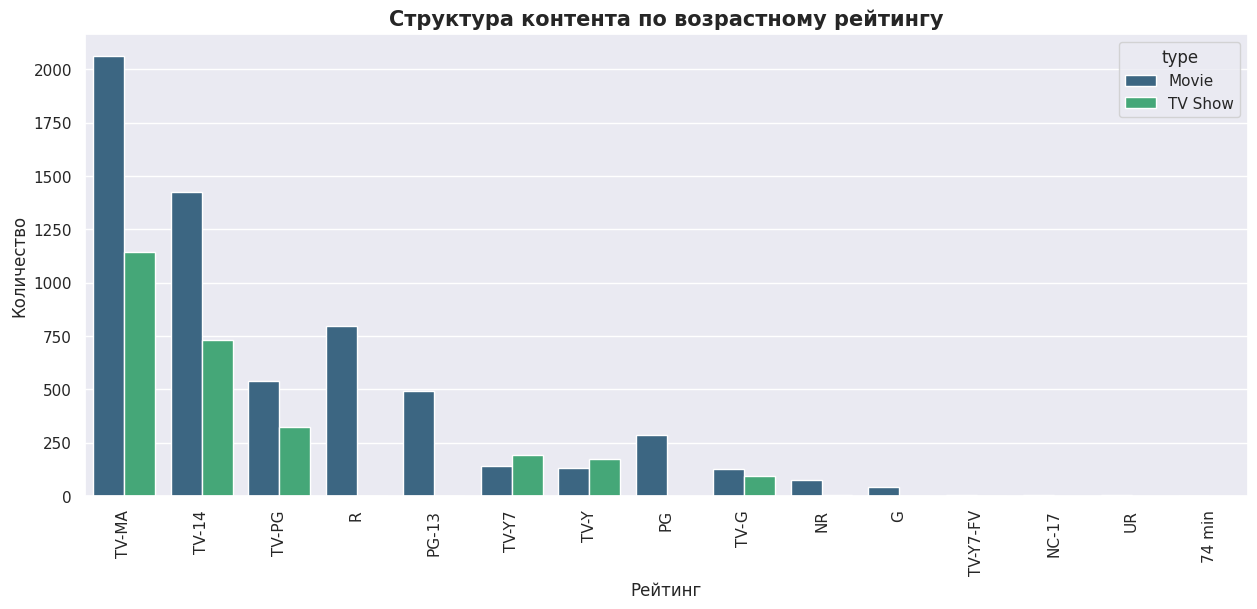

In [66]:
sns.set()
plt.figure(figsize=(15,6))
sns.countplot(x="rating",data= netflix_df,order = netflix_df['rating'].value_counts().index[0:15], hue = "type", palette ="viridis")
plt.xticks(rotation=90)
plt.title('Структура контента по возрастному рейтингу', fontsize=15, fontweight='bold')
plt.xlabel('Рейтинг')
plt.ylabel('Количество')
plt.show()

Согласно данным, доминирующим типом контента для взрослых является телевизионный контент с рейтингом TV-MA, что включает множество телешоу для взрослых. В то же время, фильмы чаще всего получают рейтинг R, что подразумевает, что они предназначены для старшей аудитории. Рейтинги TV-14 и TV-PG также представляют значительную долю как в фильмах, так и в телешоу, что указывает на наличие большого количества материалов для подростков и семейной аудитории.

Расшифровка рейтингов:

NR, TV-Y, TV-Y7, G, TV-G, PG, TV-PG - для детей

PG-13, TV-14 - для подростков

R, TV-MA, NC-17 - взрослая аудитория

Отберем только рейтинги, которые присваивают фильмам

In [67]:
rating_order_mov =  ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']

In [68]:
movie_rating = netflix_df_movie['rating'].value_counts()[rating_order_mov]

In [69]:
def barplot(data, height, h_lim=None):
    fig, ax = plt.subplots(1,1, figsize=(20, 7))
    if h_lim :
        ax.set_ylim(0, h_lim)
    ax.bar(data.index, data, width=0.6, edgecolor='black')

    color =  ['violet', 'green',  'blue']
    span_range = [[0, 6], [7, 8], [9, 11]]

    for idx, sub_title in enumerate(['Дети', 'Подростки', 'Взрослые']):
        ax.annotate(sub_title,
                    xy=(sum(span_range[idx])/2 ,height),
                    fontsize=11, fontweight='bold')
        ax.axvspan(span_range[idx][0]-0.5,span_range[idx][1]+0.5,  color=color[idx], alpha=0.4)

    ax.set_title('Рейтинг фильмов', fontsize=15, fontweight='bold')
    plt.show()

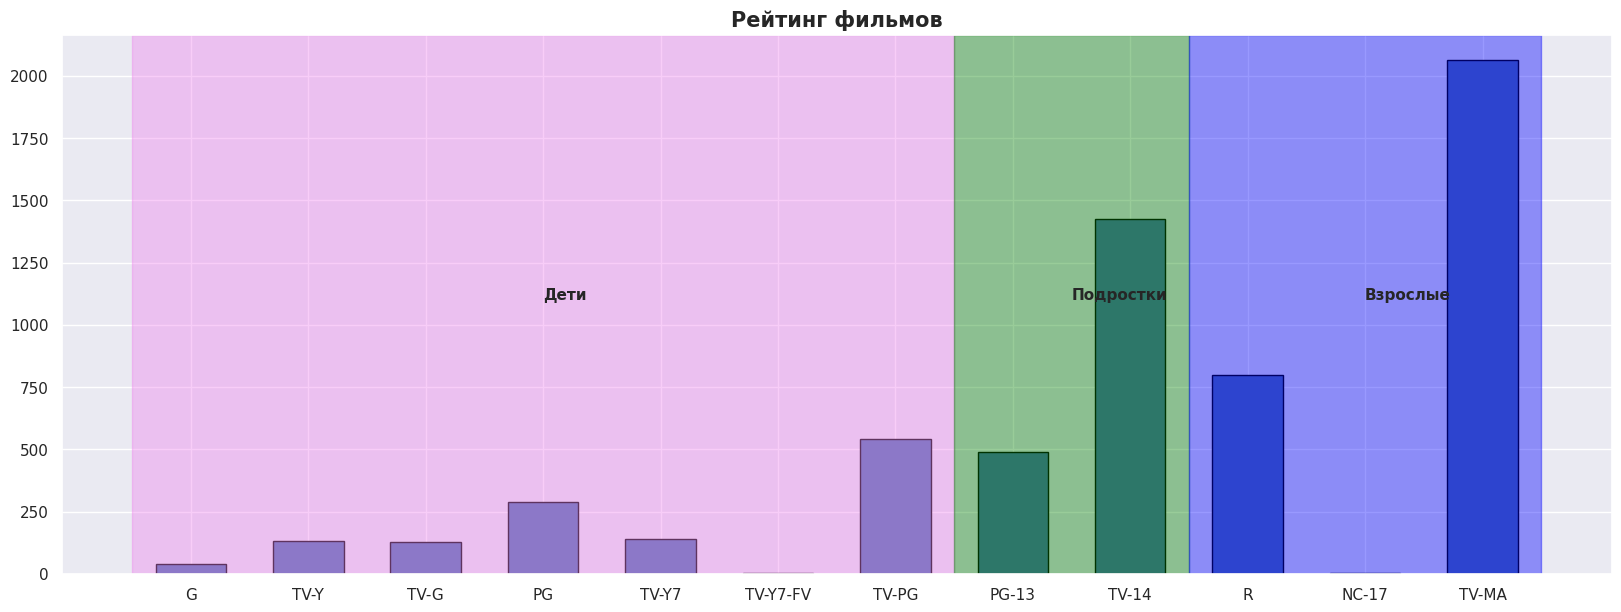

In [70]:
barplot(movie_rating, 1100)

В общем, фильмы для взрослой аудитории занимают лидирующую позицию по количеству, особенно большие объёмы контента находятся в категории TV-MA. Контент для подростков также относительно велик в категории PG-13, в то время как контент для детей вмещает наименьшее количество фильмов.

Теперь посмотрим на рейтинги, которые присваивают ТВ-шоу

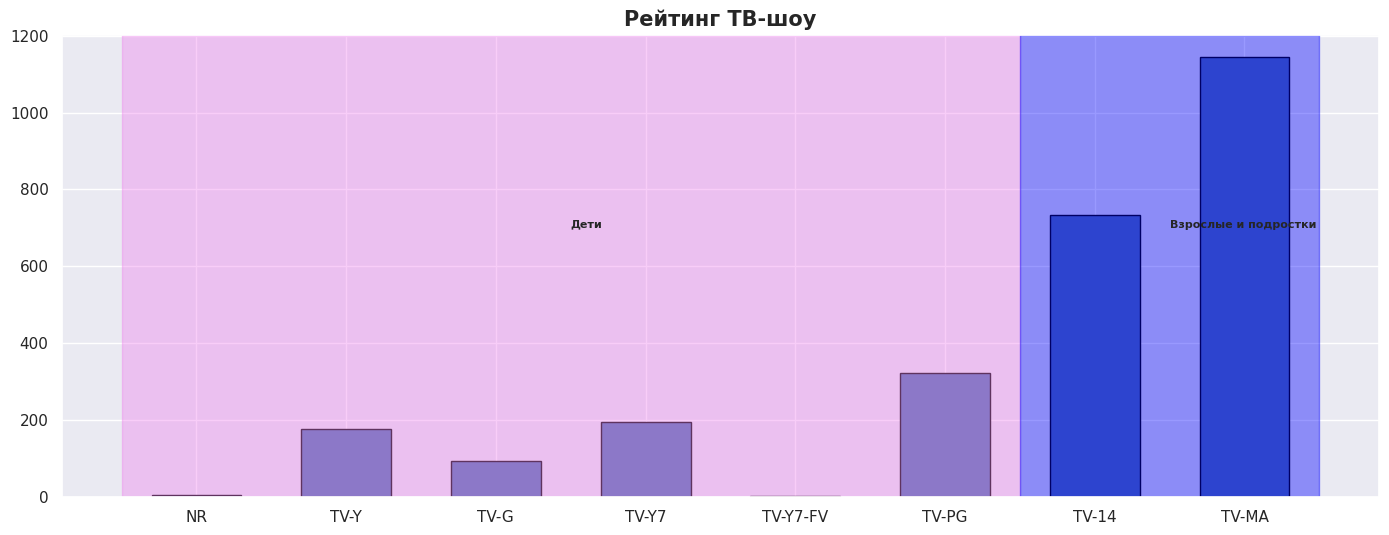

In [71]:
rating_order_tv =  ['NR','TV-Y', 'TV-G', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'TV-14', 'TV-MA']
tv_rating = netflix_df_show['rating'].value_counts()[rating_order_tv]
def barplot_tv(data, height, h_lim=None):
    fig, ax = plt.subplots(1,1, figsize=(17, 6))
    if h_lim :
        ax.set_ylim(0, h_lim)
    ax.bar(data.index, data, width=0.6, edgecolor='black')

    color =  ['violet', 'blue']
    span_range = [[0, 5], [6, 7]]

    for idx, sub_title in enumerate(['Дети','Взрослые и подростки']):
        ax.annotate(sub_title,
                    xy=(sum(span_range[idx])/2 ,height),
                    fontsize=8, fontweight='bold')
        ax.axvspan(span_range[idx][0]-0.5, span_range[idx][1]+0.5,  color=color[idx], alpha=0.4)

    ax.set_title('Рейтинг ТВ-шоу', fontsize=15, fontweight='bold')
    plt.show()
barplot_tv(tv_rating, 700)

ТВ-шоу для детской аудитории занимают меньшее количество по сравнению с контентом для взрослых и подростков, особенно для категории TV-MA, которая лидирует по количеству. Категория TV-14 также содержит значительное количество контента, что указывает на большое количество шоу, подходящих для подростков и старших зрителей.

## 3. "Портрет" типичного потребителя (вывод к разделу 3)


### На основе данных, типичный потребитель следующие характеристики:

1. Возраст:
   - Зрители в основном взрослые и подростки, что видно по большому количеству ТВ-шоу с рейтингами TV-14 и TV-MA.
   - Детская аудитория также присутствует, но в меньшей степени, что отражено в рейтингах TV-Y и TV-Y7.

2. Предпочтения по содержанию:
   - Взрослые зрители предпочитают более зрелый и сложный контент с рейтингом TV-MA.
   - Подростки также играют значительную роль в потреблении контента, предпочитая шоу с рейтингом TV-14.
   - Родители смотрят ТВ-шоу вместе со своими детьми, что объясняет популярность рейтинга TV-PG (родительский контроль).

3. Частота потребления:
   - Наиболее популярные и часто просматриваемые шоу находятся в категориях TV-MA и TV-14.

4. Рейтинг не имеет значения для части аудитории:
   - Некоторое количество потребителей смотрит нерейтинговые шоу (NR), показывая интерес к различным форматам контента без возрастных ограничений.

5. Разнообразие интересов:
   - Наличие множества шоу разных категорий и жанров указывает на разнообразие интересов аудитории.

Заключение:
1. Преобладание взрослых и подростков среди зрителей.
2. Взрослый контент (TV-MA и TV-14) наиболее популярен.
3. Зрители с детьми выбирают контент с рейтингом TV-PG.
4. Интересы аудитории разнообразны, что отражается в широком спектре рейтингов.


# Общий вывод по проекту

*   	**Взаимосвязь характеристик и предпочтений**:
Анализ выявил значительную корреляцию между возрастом аудитории и рейтингами ТВ-шоу. Взрослые предпочитают более зрелый контент с рейтингом TV-MA, тогда как подростки активно потребляют шоу с рейтингом TV-14.

*   	**Тенденции потребления**:
Данные показывают, что популярность шоу с рейтингами TV-MA и TV-14 наибольшая среди всех возрастных категорий. Наименее популярные рейтинги - детские категории TV-Y и TV-Y7.

*   	**Профиль типичного потребителя**:
Анализ показал, что типичный потребитель ТВ-шоу - это взрослый или подросток, предпочитающий зрелый контент. В семьях с детьми наблюдается тенденция к просмотру передач с рейтингом TV-PG поскольку есть элемент родительского контроля.

---

**Практическое значение результатов:**

*  **Оптимизация контентной стратегии**:
Полученные данные могут быть использованы для разработки более точных стратегий контента, которые удовлетворяют потребности каждой возрастной группы. Это позволит эффективнее целить маркетинговые кампании и увеличивать вовлеченность зрителей.

*  **Улучшение пользовательского опыта**:
Понимание предпочтений аудитории позволяет создателям ТВ-шоу разрабатывать контент, который лучше соответствует интересам разных возрастных групп. Это ведет к увеличению количества зрителей и времени, которое они проводят за просмотром телевизионного контента.

Анализ показал, что типичный потребитель ТВ-шоу - взрослый или подросток, предпочитающий зрелый контент. Дополнительные исследования и разработка адаптивных контентных стратегий помогут компаниям предоставлять более релевантный и интересный контент, что приведет к увеличению лояльности и вовлеченности зрителей.
